<hr style="border-width:2px;border-color:#75DFC1">

# Study Case

### Import packages

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as pximport 
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression, mutual_info_regression, RFE, RFECV
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score


from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


from sklearn import svm
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

import warnings
warnings.filterwarnings('ignore')

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import xgboost as xgb

### DataFrame observation

In [27]:
#read csv file 
df_training = pd.read_csv('training.csv', sep = ',')
df_training.head()

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURNED
0,C100000,zero,660.000000,19995.0,0,0,897338.0,False,4,3,160.0,155,1,1.2,15,very_unsat,little,considering,STAY
1,C100001,one,317.647059,31477.0,155,15,393396.0,True,0,1,100.0,245,27,2.7,4,unsat,little,considering,LEAVE
2,C100006,zero,208.695652,66742.0,0,13,937197.0,False,4,2,127.0,493,20,2.6,4,avg,very_little,considering,STAY
3,C100008,zero,265.017668,40864.0,183,0,986430.0,False,3,3,86.0,390,13,2.5,12,unsat,very_high,considering,LEAVE
4,C100010,one,440.000000,43321.5,200,0,394622.0,True,2,3,77.0,175,18,2.4,10,very_unsat,little,actively_looking_into_it,LEAVE


In [28]:
df_training.info()
df_training.describe()
df_training.dtypes
df_training.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11981 entries, 0 to 11980
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CUSTOMER_ID                  11981 non-null  object 
 1   COLLEGE                      11981 non-null  object 
 2   DATA                         11981 non-null  float64
 3   INCOME                       11981 non-null  float64
 4   OVERCHARGE                   11981 non-null  int64  
 5   LEFTOVER                     11981 non-null  int64  
 6   HOUSE                        11346 non-null  float64
 7   LESSTHAN600k                 11346 non-null  object 
 8   CHILD                        11981 non-null  int64  
 9   JOB_CLASS                    11981 non-null  int64  
 10  REVENUE                      11981 non-null  float64
 11  HANDSET_PRICE                11981 non-null  int64  
 12  OVER_15MINS_CALLS_PER_MONTH  11981 non-null  int64  
 13  TIME_CLIENT     

(11981, 19)

In [29]:
#pd.isnull(df_training['HOUSE']).values.ravel().sum()
#pd.notnull(df_training['HOUSE']).values.ravel().sum()

# Warning!! We havve NaN in some columns, we are going to delete these rows
# and see if these columns are important or not
df_training = df_training[df_training['HOUSE'].notna()]
df_training = df_training[df_training['LESSTHAN600k'].notna()]
df_training.reset_index(inplace=True, drop=True)

### Data Cleaning 

In [30]:
df_training['COLLEGE'] = df_training['COLLEGE'].map({'zero' : float(0), 'one': float(1)})
df_training['DATA'] = df_training['DATA'].round(2)
columns_to_float = ['OVERCHARGE', 'LEFTOVER', 'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION']
df_training[columns_to_float] = df_training[columns_to_float].astype(float)
df_training['LESSTHAN600k'] = df_training['LESSTHAN600k'].astype(float)
df_training['CHILD'] = df_training['CHILD'].astype(float)
df_training['JOB_CLASS'] = df_training['JOB_CLASS'].astype(float)
df_training['DATA'] = df_training['DATA'].round(2)

#df_training['REPORTED_SATISFACTION'].unique()


In [31]:

df_training['CHURNED'] = df_training['CHURNED'].map({'LEAVE' : float(0), 'STAY': float(1)})

In [32]:
# list(df_training['REPORTED_SATISFACTION'].unique()) 
# list(df_training['REPORTED_USAGE_LEVEL'].unique()) 
# list(df_training['CONSIDERING_CHANGE_OF_PLAN'].unique()) 

df_training['CONSIDERING_CHANGE_OF_PLAN'] = df_training['CONSIDERING_CHANGE_OF_PLAN'].map({
                                                    'actively_looking_into_it' : float(1),
                                                    'considering': float(.75),
                                                    'perhaps': float(.5),
                                                    'no': float(.25),
                                                    'never_thought': float(0),
                                                    })

df_training['REPORTED_USAGE_LEVEL'] = df_training['REPORTED_USAGE_LEVEL'].map({
                                                    'very_little' : float(1),
                                                    'little': float(.75),
                                                    'avg': float(.5),
                                                    'high' : float(.25),
                                                    'very_high': float(0),
                                                    })

df_training['REPORTED_SATISFACTION'] = df_training['REPORTED_SATISFACTION'].map({
                                                    'very_unsat' : float(1),
                                                    'unsat': float(.75),
                                                    'avg': float(.5),
                                                    'sat' : float(.25),
                                                    'very_sat': float(0),
                                                    })

In [33]:
df_training.head()

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURNED
0,C100000,0.0,660.00,19995.0,0.0,0.0,897338.0,0.0,4.0,3.0,160.0,155.0,1.0,1.2,15.0,1.00,0.75,0.75,1.0
1,C100001,1.0,317.65,31477.0,155.0,15.0,393396.0,1.0,0.0,1.0,100.0,245.0,27.0,2.7,4.0,0.75,0.75,0.75,0.0
2,C100006,0.0,208.70,66742.0,0.0,13.0,937197.0,0.0,4.0,2.0,127.0,493.0,20.0,2.6,4.0,0.50,1.00,0.75,1.0
3,C100008,0.0,265.02,40864.0,183.0,0.0,986430.0,0.0,3.0,3.0,86.0,390.0,13.0,2.5,12.0,0.75,0.00,0.75,0.0
4,C100010,1.0,440.00,43321.5,200.0,0.0,394622.0,1.0,2.0,3.0,77.0,175.0,18.0,2.4,10.0,1.00,0.75,1.00,0.0


In [34]:
#Dummies 
# def createDummies(df, col, var_name):
#     dummy = pd.get_dummies(df[col], prefix=var_name)
#     df = df.drop(col, axis = 1)
#     df = pd.concat([df, dummy ], axis = 1)
#     return df

# df_training = createDummies(df_training, 'REPORTED_SATISFACTION', var_name='Report_Satisf')
# df_training = createDummies(df_training, 'CONSIDERING_CHANGE_OF_PLAN', var_name='Change_Plan')
# df_training = createDummies(df_training, 'REPORTED_USAGE_LEVEL', var_name='Report_Usage')

### Select main features

Features deleted by intuition for the model :
 
 * ***CUSTOMER_ID*** :  nothing relevant to the analysis
 * ***COLLEGE*** :  I think it's not important, this feature you can know thanks to clients' revenue
 * ***LESSTHAN600k*** : It's a feature that depends directly on HOUSE feature. (Good news! It's a feature with NaN) 
 * ***JOB_CLASS*** : I think the job_class is not very important. it's more important the income. Demonstrate both features are correlated.!!

 

* Afficher un *strip plot* permettant de visualiser le nombre de points marqués par les joueurs, en fonction de leurs postes (variable `pos`).

In [35]:
remCol = []
for col in df_training.columns:
    if (col=="CUSTOMER_ID") | (col=="COLLEGE")  |  (col=="LESSTHAN600k" ) |  (col=="JOB_CLASS" ):
        print("column "+ col+" deleted")
    else:
        remCol.append(col)
        
df_training = df_training[remCol]

column CUSTOMER_ID deleted
column COLLEGE deleted
column LESSTHAN600k deleted
column JOB_CLASS deleted


### Normalize data

In [36]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_training)
df_normalized = pd.DataFrame(normalized_data, columns=remCol)

In [37]:
scaler.inverse_transform(df_normalized)

array([[6.60000e+02, 1.99950e+04, 0.00000e+00, ..., 7.50000e-01,
        7.50000e-01, 1.00000e+00],
       [3.17650e+02, 3.14770e+04, 1.55000e+02, ..., 7.50000e-01,
        7.50000e-01, 0.00000e+00],
       [2.08700e+02, 6.67420e+04, 0.00000e+00, ..., 1.00000e+00,
        7.50000e-01, 1.00000e+00],
       ...,
       [8.00000e+01, 7.76745e+04, 0.00000e+00, ..., 7.50000e-01,
        1.00000e+00, 0.00000e+00],
       [7.77800e+01, 3.77305e+04, 0.00000e+00, ..., 7.50000e-01,
        7.50000e-01, 1.00000e+00],
       [1.92930e+02, 3.48675e+04, 3.30000e+01, ..., 7.50000e-01,
        5.00000e-01, 1.00000e+00]])

In [38]:
df_normalized.head()

,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,CHILD,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURNED
0,0.100000,0.104513,0.006667,0.000000,0.879223,0.666667,0.233546,0.032510,0.034483,0.043478,1.000000,1.00,0.75,0.75,1.0
1,0.048129,0.224967,0.523333,0.168539,0.286337,0.000000,0.106157,0.149545,0.931034,0.115942,0.214286,0.75,0.75,0.75,0.0
2,0.031621,0.594919,0.006667,0.146067,0.926117,0.666667,0.163482,0.472042,0.689655,0.111111,0.214286,0.50,1.00,0.75,1.0
3,0.040155,0.323442,0.616667,0.000000,0.984040,0.500000,0.076433,0.338101,0.448276,0.106280,0.785714,0.75,0.00,0.75,0.0
4,0.066667,0.349223,0.673333,0.000000,0.287779,0.333333,0.057325,0.058518,0.620690,0.101449,0.642857,1.00,0.75,1.00,0.0


In [82]:
df_normalized.to_csv('df_training_norm_reduced.csv', sep = ',')

### Matriz de correlación

In [39]:
corr = df_training.corr()

fig = px.imshow(corr, width=800, height=800)
fig.show()

## Logistic Regression

In [40]:
selectedCols = ['DATA','INCOME', 'HOUSE', 'OVERCHARGE', 'OVER_15MINS_CALLS_PER_MONTH', 'REPORTED_SATISFACTION',
       'CONSIDERING_CHANGE_OF_PLAN', 'HANDSET_PRICE']
X = df_normalized[selectedCols]
Y = df_normalized[['CHURNED']]

In [41]:
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=100)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
clf_LR = LogisticRegression(random_state=1).fit(x_train, y_train)

C:\Users\Juanjo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [43]:
clf_LR.score(x_train, y_train)

0.7085720581754077

In [44]:
clf_LR.score(x_test, y_test)

0.711453744493392

In [45]:
y_pred_LR = clf_LR.predict(x_test)

In [46]:
y_proba_LR = clf_LR.predict_proba(x_test)

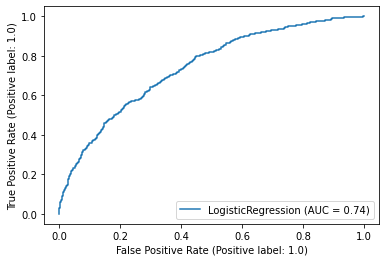

In [52]:
metrics.plot_roc_curve(clf_LR, x_test, y_test) ;

## Random Forest Regressor

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
clf_RF = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=100)
clf_RF.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, random_state=100)

In [55]:
clf_RF.score(x_train, y_train)

0.9643014543851918

In [56]:
y_proba_RF = clf_RF.predict_proba(x_test)

In [57]:
y_pred_RF = clf_RF.predict(x_test)
roc_auc_score(y_pred_RF, y_test)

0.7451656168666309

In [58]:
clf_RF.score(x_test, y_test)

0.7665198237885462

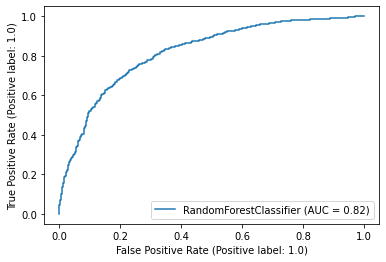

In [59]:
from sklearn import metrics 
metrics.plot_roc_curve(clf_RF, x_test, y_test) 

In [61]:
predThresH = (clf_RF.predict_proba(x_test)[:,1] >= 0.38).astype('int')
accuracy_score(predThresH, y_test)

0.7506607929515419

In [62]:
roc_auc_score(predThresH, y_test)

0.7567174357808593

##  XGboost

In [63]:
import xgboost as xgb

# Init classifier
xgb_cl = xgb.XGBClassifier(base_score=0.3, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=0.8, colsample_bytree=0.9, gamma=0.4,
              learning_rate=0.0400000012, max_delta_step=20, max_depth=14,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=75,  reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

xgb_cl.fit(x_train, y_train)
preds = xgb_cl.predict(x_train)

In [64]:
roc_auc_score(preds, y_train)

0.973534364105108

In [65]:
preds = xgb_cl.predict(x_test)
roc_auc_score(preds, y_test)

0.7311892032906163

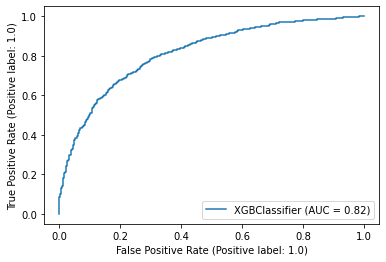

In [66]:
metrics.plot_roc_curve(xgb_cl, x_test, y_test) 

In [67]:
predThresH = (clf_RF.predict_proba(x_test)[:,1] >= 0.38).astype('int')
accuracy_score(predThresH, y_test)

0.7506607929515419

In [68]:
roc_auc_score(predThresH, y_test)

0.7567174357808593

# Client discount

### We want offer discounts to clients with a high churn probability  => threshold = 0.35

In [69]:
xToAnalyse = df_normalized.copy()

In [70]:
xToAnalyse["CHURN_LABEL"] = (clf_RF.predict_proba(xToAnalyse[selectedCols])[:,1] >= 0.4).astype('int')

In [71]:
xToAnalyse["CHURN_PROBABILITY"] = clf_RF.predict_proba(xToAnalyse[selectedCols])[:,1]

In [72]:
xToAnalyse["CHURN_PROBABILITY"].head(10)

0    0.914451
1    0.128727
2    0.845646
3    0.414989
4    0.095038
5    0.656835
6    0.841410
7    0.823141
8    0.030470
9    0.419822
Name: CHURN_PROBABILITY, dtype: float64

In [73]:
originalFacture = df_training["OVERCHARGE"] + df_training["REVENUE"]

In [74]:
discList = [0, 5, 10, 15, 20, 25, 30,35, 40, 45,50]
#discList = [0]
for disc in discList:
    beforeExpValue = np.multiply(xToAnalyse["CHURN_PROBABILITY"],originalFacture)
    xToAnalyse.iloc[:]["OVERCHARGE"]  = xToAnalyse["OVERCHARGE"]*(1.-float(disc)/float(100.))
    afterProba = clf_RF.predict_proba(xToAnalyse[selectedCols])[:,1]
    if disc == 0:
        afterExpValue = beforeExpValue
    else:
        afterExpValue = np.multiply(afterProba,originalFacture)*(1.-float(disc)/float(100.)) - 10.
        
    benefit = afterExpValue - beforeExpValue
    xToAnalyse["disc_"+str(disc)] = disc
    xToAnalyse[str(disc)] = benefit
    

In [75]:
colsDisc = []
[colsDisc.append(str(disc)) for disc in discList]

[None, None, None, None, None, None, None, None, None, None, None]

In [76]:
colsDisc

['0', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50']

In [77]:
xToAnalyse["maxBenefit"] = xToAnalyse[colsDisc].loc[:].max(axis=1)

In [78]:
xToAnalyse["DISCOUNT"] = xToAnalyse[colsDisc].loc[:].idxmax(axis=1).astype(int)

<AxesSubplot:>

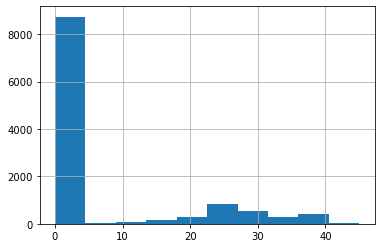

In [79]:
xToAnalyse["DISCOUNT"].hist()

<AxesSubplot:>

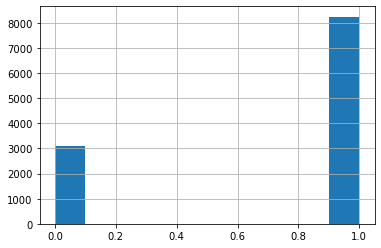

In [80]:
xToAnalyse["CHURN_LABEL"].hist()

In [81]:
xToAnalyse[colsDisc].head(20)

,0,5,10,15,20,25,30,35,40,45,50
0,0.0,-17.315608,-24.631217,-31.946825,-39.262434,-46.578042,-53.893650,-61.209259,-68.524867,-75.840476,-83.156084
1,0.0,-1.126440,1.681423,3.029040,39.520917,28.516562,63.496560,61.939175,51.696341,40.421908,32.853970
2,0.0,-15.369850,-20.739700,-26.109550,-31.479400,-36.849250,-42.219100,-47.588950,-52.958800,-58.328650,-63.698500
3,0.0,-12.600185,-5.645407,-11.976657,-6.447859,0.692076,10.243200,0.454846,-11.705942,-22.591926,-32.268072
4,0.0,-4.735779,-9.915990,-8.015862,-3.428175,25.958461,42.064762,47.528526,53.468532,48.328300,40.590456
5,0.0,-14.696373,-19.392746,-24.089120,-28.785493,-33.481866,-38.178239,-42.874612,-47.570985,-52.267359,-56.963732
6,0.0,-18.035466,-26.070933,-34.106399,-42.141865,-50.177332,-58.212798,-66.248265,-74.283731,-82.319197,-90.354664
7,0.0,-26.288805,-40.165680,-62.640888,-68.877652,-95.723762,-121.508537,-127.922622,-148.623802,-165.598438,-179.343351
8,0.0,-6.945002,-4.273004,7.991179,31.967875,81.966262,89.051292,73.321347,63.400905,54.205160,49.222414
9,0.0,-31.555406,-27.166068,-51.285819,-62.854949,-28.345497,-47.131265,-37.925384,-37.252132,-45.617375,-53.553098


In [771]:
xToAnalyse["CLIENT_TO_CONTACT"] = 'NO'
xToAnalyse["CLIENT_TO_CONTACT"][xToAnalyse["DISCOUNT"]!=0] = 'YES'

C:\Users\marta\AppData\Local\Temp/ipykernel_3972/1220258670.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [772]:
xToAnalyse.columns

Index(['DATA', 'INCOME', 'OVERCHARGE', 'LEFTOVER', 'HOUSE', 'CHILD', 'REVENUE',
       'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH', 'TIME_CLIENT',
       'AVERAGE_CALL_DURATION', 'REPORTED_SATISFACTION',
       'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN', 'CHURN_LABEL',
       'CHURN_PROBABILITY', 'disc_0', '0', 'disc_5', '5', 'disc_10', '10',
       'disc_15', '15', 'disc_20', '20', 'disc_25', '25', 'disc_30', '30',
       'disc_35', '35', 'disc_40', '40', 'disc_45', '45', 'disc_50', '50',
       'maxBenefit', 'DISCOUNT', 'CLIENT_TO_CONTACT'],
      dtype='object')

In [773]:
RESULTS_CSV = xToAnalyse[["CHURN_PROBABILITY", "CHURN_LABEL", "CLIENT_TO_CONTACT", "DISCOUNT"]]

In [774]:
RESULTS_CSV.to_csv("results.csv", sep=";")

In [684]:
reslist = []
iClient = 8
nbDisc = 10
maxBenefit = 0
discOpt = 0
for disc in range(nbDisc+1):
        beforeExpValue = xToAnalyse["proba"][iClient]*originalFacture[iClient]
        afterPrice  = xToAnalyse["OVERCHARGE"][iClient]*(1.-float(disc)/float(nbDisc))
        xToAnalyse[selectedCols].iloc[iClient]["OVERCHARGE"] = afterPrice
        afterProba = clf_RF.predict_proba(xToAnalyse[selectedCols].loc[iClient:iClient])[:,1][0]
        afterExpValue = afterProba*originalFacture[iClient]*(1.-float(disc)/float(nbDisc)) - 10.
        benefit = afterExpValue - beforeExpValue
        #reslist.append([disc, beforeExpValue, afterPrice, afterProba, afterExpValue, benefit])
        reslist.append([disc, benefit])

In [685]:
reslist

[[0, -10.0],
 [1, -11.167004273504274],
 [2, -12.334008547008546],
 [3, -13.501012820512821],
 [4, -14.668017094017095],
 [5, -15.835021367521367],
 [6, -17.00202564102564],
 [7, -18.169029914529915],
 [8, -19.33603418803419],
 [9, -20.50303846153846],
 [10, -21.670042735042735]]